In [18]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
path_to_repo = "/home/serena/reuse/hom-generator/"
evo_fname = path_to_repo + "data/found-mutations/evo-sshom.txt"
ex_fname = path_to_repo + "data/found-mutations/ex-sshom.txt"

evo = []
ex = []

with open(evo_fname) as f:
    for l in f:
        evo.append(l.strip("\n"))
        
with open(ex_fname) as f:
    for l in f:
        ex.append(l.strip("\n"))

In [7]:
print(len(ex))
print(len(evo))

23
33


In [11]:
ex_set = set(ex)
evo_set = set(evo)

print("Exhaustive is subset of generated : ", ex_set.issubset(evo_set))
print("Generated is subset of exhaustive : ", evo_set.issubset(ex_set))

Exhaustive is subset of generated :  True
Generated is subset of exhaustive :  False


In [12]:
extra_homs = evo_set.difference(ex_set)
print("Extra HOMs that the generated test set found")
print(extra_homs)

{'m0 m2 m7', 'm9 m1', 'm0 m7', 'm1 m7', 'm0 m1 m2 m7', 'm9 m1 m7', 'm0 m1 m2', 'm0 m9 m1 m2', 'm0 m1 m9 m7 m2', 'm0 m9'}


In [22]:
ex_hist = {}
evo_hist = {}
extra_hist = {}

for m in evo:
    foms = m.split(" ")
    for f in foms:
        f_num = int(f[1:])
        count = evo_hist.get(f_num, 0) + 1
        evo_hist[f_num] = count
for m in ex:
    foms = m.split(" ")
    for f in foms:
        f_num = int(f[1:])
        count = ex_hist.get(f_num, 0) + 1
        ex_hist[f_num] = count
for m in extra_homs:
    foms = m.split(" ")
    for f in foms:
        f_num = int(f[1:])
        count = extra_hist.get(f_num, 0) + 1
        extra_hist[f_num] = count
        
print("Unique foms in exhaustive homs : \n\t", sorted(ex_hist.keys()))
print("Unique foms in generated homs : \n\t", sorted(evo_hist.keys()))
print("Unique foms in not exhaustive homs : \n\t", sorted(extra_hist.keys()))

Unique foms in exhaustive homs : 
	 [0, 1, 2, 4, 7, 9, 10, 11, 13, 14, 15, 17, 18, 19, 20, 22, 23, 25]
Unique foms in generated homs : 
	 [0, 1, 2, 4, 7, 9, 10, 11, 13, 14, 15, 17, 18, 19, 20, 22, 23, 25]
Unique foms in not exhaustive homs : 
	 [0, 1, 2, 7, 9]


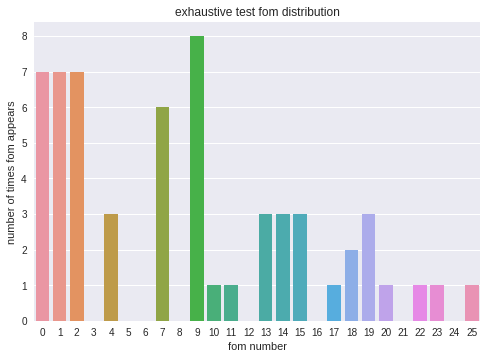

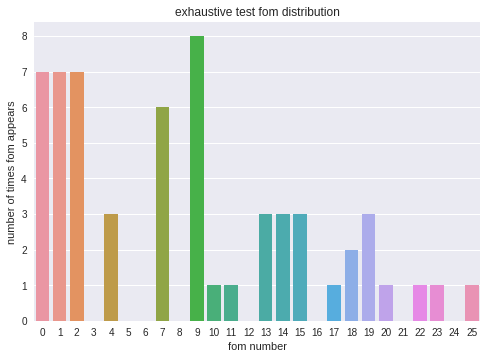

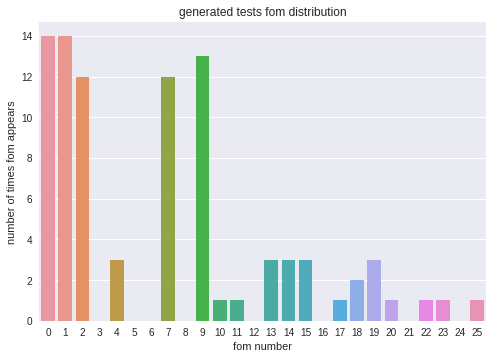

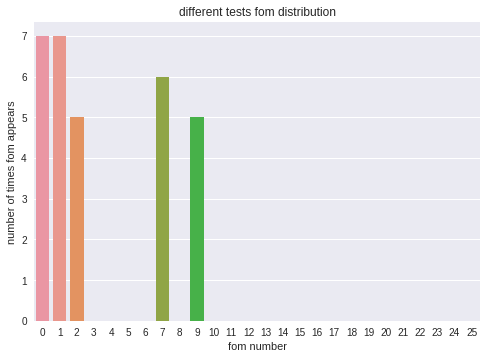

In [28]:
ex_x = []
ex_y = []
for i in range(26):
    ex_x.append(i)
    ex_y.append(ex_hist.get(i, 0))
sns.barplot(x=ex_x,y=ex_y)
plt.xlabel("fom number")
plt.ylabel("number of times fom appears")
plt.title("exhaustive test fom distribution")
plt.figure()

evo_x = []
evo_y = []
for i in range(26):
    evo_x.append(i)
    evo_y.append(evo_hist.get(i, 0))
sns.barplot(x=evo_x,y=evo_y)
plt.xlabel("fom number")
plt.ylabel("number of times fom appears")
plt.title("generated tests fom distribution")
plt.figure()

extra_x = []
extra_y = []
for i in range(26):
    extra_x.append(i)
    extra_y.append(extra_hist.get(i, 0))
sns.barplot(x=extra_x,y=extra_y)
plt.xlabel("fom number")
plt.ylabel("number of times fom appears")
plt.title("different tests fom distribution")

plt.show()